In [2]:
from azureml.core import Workspace
ws_1 = Workspace.get(name="ml-tutorial-1",subscription_id="08c09bd9-9292-4776-9b92-dcd3da4f6cfb",resource_group="ml-resource-tutorial-1")
print("workspace",ws_1.name)

# to get compute target from new workspace
for compute_target in ws_1.compute_targets:
    compute = ws_1.compute_targets[compute_target]
    print("compute target:",compute.name,":", compute.type)

workspace ml-tutorial-1
compute target: my-ml-compute : ComputeInstance


In [3]:
# run experiment
from azureml.core import Experiment

experiment = Experiment(workspace=ws_1, name="my-first-experiment")

# start the experiment
run = experiment.start_logging()

# experiment code goes here

# end the experiment
run.complete()

In [15]:
# load the dataset and count the rows using experiment

import pandas as pd

exp_1 = Experiment(workspace= ws_1, name="read-data-experiment")

run = exp_1.start_logging()

data = pd.read_csv('../mslearn-dp100/data/diabetes.csv')

row_count = len(data)

run.log("Row count:",row_count)

run.complete()




In [16]:
# view run details
from azureml.widgets import RunDetails
RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

In [17]:
#log: Record a single named value.
#log_list: Record a named list of values.
#log_row: Record a row with multiple columns.
#log_table: Record a dictionary as a table.
#log_image: Record an image file or a plot.

In [18]:
# Get logged metrics
import json

metrics =run.get_metrics()

print(json.dumps(metrics))


{"Row count:": 10000}


In [22]:
# get logged files

files = run.get_file_names()

print("files:",json.dumps(files,indent=2))

# create output files of experiment

#run.upload_file(name="outputs/read-data-experiment-log.csv", path_or_stream = "outputs/read-data-experiment-log.csv")

files: []


In [23]:
# Get logged metrics
print("Metrics:")
metrics = run.get_metrics()
for metric_name in metrics:
    print(metric_name, ":", metrics[metric_name])

# Get output files
print("\nFiles:")
files = run.get_file_names()
for file in files:
    print(file)

Metrics:
Row count: : 10000

Files:


Starting experiment: mslearn-diabetes-experiment
Analyzing 10000 rows of data


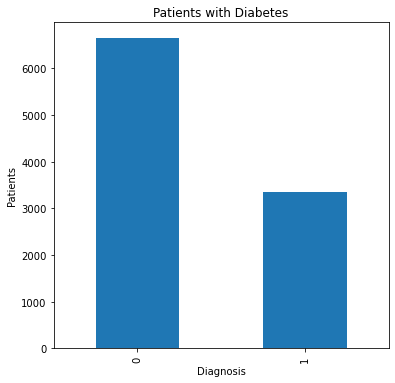

In [24]:
# New Experiment 
import matplotlib.pyplot as plt
%matplotlib inline 

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace=ws_1, name="mslearn-diabetes-experiment")

# Start logging data from the experiment, obtaining a reference to the experiment run
run = experiment.start_logging()
print("Starting experiment:", experiment.name)

# load the data from a local file
data = pd.read_csv('../mslearn-dp100/data/diabetes.csv')

# Count the rows and log the result
row_count = (len(data))
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))

# Plot and log the count of diabetic vs non-diabetic patients
diabetic_counts = data['Diabetic'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
diabetic_counts.plot.bar(ax = ax) 
ax.set_title('Patients with Diabetes') 
ax.set_xlabel('Diagnosis') 
ax.set_ylabel('Patients')
plt.show()
run.log_image(name='label distribution', plot=fig)

# log distinct pregnancy counts
pregnancies = data.Pregnancies.unique()
run.log_list('pregnancy categories', pregnancies)

# Log summary statistics for numeric columns
med_columns = ['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI']
summary_stats = data[med_columns].describe().to_dict()
for col in summary_stats:
    keys = list(summary_stats[col].keys())
    values = list(summary_stats[col].values())
    for index in range(len(keys)):
        run.log_row(col, stat=keys[index], value = values[index])
        
# Save a sample of the data and upload it to the experiment output
data.sample(100).to_csv('mslearn-diabetes-experiment-sample-data.csv', index=False, header=True)
run.upload_file(name='outputs/mslearn-diabetes-experiment-sample-data-1.csv', path_or_stream='./mslearn-diabetes-experiment-sample-data.csv')

# Complete the run
run.complete()

In [25]:
RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

In [28]:
metrics = run.get_metrics()
files = run.get_file_names()
for metric in metrics:
    print("metrics:", metrics[metric])
    
for file in files:
    print("file:",file)

metrics: 10000
metrics: aml://artifactId/ExperimentRun/dcid.d9a97ebe-88d9-42c0-b378-6352a659d779/label distribution_1640785789.png
metrics: [0, 8, 7, 9, 1, 3, 5, 2, 6, 11, 4, 13, 10, 12, 14]
metrics: {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 107.8502, 31.920909360565563, 44.0, 84.0, 105.0, 129.0, 192.0]}
metrics: {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 71.2075, 16.801478289640706, 24.0, 58.0, 72.0, 85.0, 117.0]}
metrics: {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 28.8176, 14.506480415228332, 7.0, 15.0, 31.0, 41.0, 92.0]}
metrics: {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 139.2436, 133.77791937465278, 14.0, 39.0, 85.0, 197.0, 796.0]}
metrics: {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 31.56702174359113, 9.804365693559113, 18.20080735, 21.247426835, 31.9224

In [29]:
# download the files produced by the experiment

import os

download_folder = 'downloaded-files'
run.download_files(prefix="outputs",output_directory=download_folder)

# Verify the files have been downloaded
for root, directories, filenames in os.walk(download_folder): 
    for filename in filenames:  
        print (os.path.join(root,filename))


downloaded-files/outputs/mslearn-diabetes-experiment-sample-data-1.csv


In [30]:
# Get details of log

run.get_details_with_logs()

{'runId': 'd9a97ebe-88d9-42c0-b378-6352a659d779',
 'target': 'local',
 'status': 'Completed',
 'startTimeUtc': '2021-12-29T13:49:42.405798Z',
 'endTimeUtc': '2021-12-29T13:49:55.443075Z',
 'services': {},
 'properties': {'ContentSnapshotId': '5a175fbe-3e2a-4554-850e-6f65946d16ba'},
 'inputDatasets': [],
 'outputDatasets': [],
 'logFiles': {},
 'submittedBy': 'Vijay Kumar'}

In [31]:
#                      # Experiment run a script



import os, shutil
# Create a folder for the experiment files
folder_name = 'diabetes-experiment-files'
experiment_folder = './' + folder_name
os.makedirs(folder_name, exist_ok=True)

# Copy the data file into the experiment folder
shutil.copy('../mslearn-dp100/data/diabetes.csv', os.path.join(folder_name, "diabetes.csv"))



'diabetes-experiment-files/diabetes.csv'

In [33]:
# create a Python script containing the code for our experiment, and save it in the experiment folder
%%writefile $folder_name/diabetes_experiment.py
from azureml.core import Run
import pandas as pd
import os


run = Run.get_context()

# load the diabetes dataset
data = pd.read_csv('diabetes.csv')

# Count the rows and log the result
row_count = (len(data))
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))


# Count and log the label counts
diabetic_counts = data['Diabetic'].value_counts()
print(diabetic_counts)
for k, v in diabetic_counts.items():
    run.log('Label:' + str(k), v)
      
# Save a sample of the data in the outputs folder (which gets uploaded automatically)
os.makedirs('outputs', exist_ok=True)
data.sample(100).to_csv("outputs/sample.csv", index=False, header=True)

# Complete the run
run.complete()

UsageError: Line magic function `%%writefile` not found.


In [37]:
# To run the above script, create a ScriptRunConfig

from azureml.core import Experiment, ScriptRunConfig, Environment
from azureml.widgets import RunDetails

# Create a Python environment for the experiment (from a .yml file)
env = Environment.from_conda_specification("Experiment_env","environment.yml")

# Create a script config
script_config = ScriptRunConfig(source_directory=folder_name, script="diabetes_experiment.py",environment=env)


# submit experiment
experiment= Experiment(workspace = ws_1, name="mslearn-diabetes-using-script")
run = experiment.submit(config=script_config)

# show details
RunDetails(run).show()
run.wait_for_completion()


_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

{'runId': 'mslearn-diabetes-using-script_1640790234_412cdeae',
 'target': 'local',
 'status': 'Finalizing',
 'startTimeUtc': '2021-12-29T15:03:56.793418Z',
 'services': {},
 'properties': {'_azureml.ComputeTargetType': 'local',
  'ContentSnapshotId': 'fda08a68-f0fa-4c58-800d-b1d2c5456408'},
 'inputDatasets': [],
 'outputDatasets': [],
 'runDefinition': {'script': 'diabetes_experiment.py',
  'command': '',
  'useAbsolutePath': False,
  'arguments': [],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'local',
  'dataReferences': {},
  'data': {},
  'outputData': {},
  'datacaches': [],
  'jobName': None,
  'maxRunDurationSeconds': 2592000,
  'nodeCount': 1,
  'instanceTypes': [],
  'priority': None,
  'credentialPassthrough': False,
  'identity': None,
  'environment': {'name': 'Experiment_env',
   'version': 'Autosave_2021-12-29T15:03:55Z_d9242a6d',
   'python': {'interpreterPath': 'python',
    'userManagedDependencies': False,
    'co

In [38]:
run.get_details_with_logs()

{'runId': 'mslearn-diabetes-using-script_1640790234_412cdeae',
 'target': 'local',
 'status': 'Completed',
 'startTimeUtc': '2021-12-29T15:03:56.793418Z',
 'endTimeUtc': '2021-12-29T15:04:13.630965Z',
 'services': {},
 'properties': {'_azureml.ComputeTargetType': 'local',
  'ContentSnapshotId': 'fda08a68-f0fa-4c58-800d-b1d2c5456408'},
 'inputDatasets': [],
 'outputDatasets': [],
 'runDefinition': {'script': 'diabetes_experiment.py',
  'command': '',
  'useAbsolutePath': False,
  'arguments': [],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'local',
  'dataReferences': {},
  'data': {},
  'outputData': {},
  'datacaches': [],
  'jobName': None,
  'maxRunDurationSeconds': 2592000,
  'nodeCount': 1,
  'instanceTypes': [],
  'priority': None,
  'credentialPassthrough': False,
  'identity': None,
  'environment': {'name': 'Experiment_env',
   'version': 'Autosave_2021-12-29T15:03:55Z_d9242a6d',
   'python': {'interpreterPath': 'python',


In [39]:
# to download logs

log_folder = 'downloaded-logs'

# Download all files
run.get_all_logs(destination=log_folder)

# Verify the files have been downloaded
for root, directories, filenames in os.walk(log_folder): 
    for filename in filenames:  
        print (os.path.join(root,filename))

downloaded-logs/azureml-logs/60_control_log.txt
downloaded-logs/azureml-logs/70_driver_log.txt
downloaded-logs/logs/azureml/26783_azureml.log


In [41]:
# view history of experiment's run

from azureml.core import Experiment, Run

diabetes_experiment = ws_1.experiments["mslearn-diabetes-experiment"]

for logged_run in diabetes_experiment.get_runs():
    print('Run ID:', logged_run.id)
    metrics = logged_run.get_metrics()
    for key in metrics.keys():
        print('-', key, metrics.get(key))

Run ID: d9a97ebe-88d9-42c0-b378-6352a659d779
- observations 10000
- label distribution aml://artifactId/ExperimentRun/dcid.d9a97ebe-88d9-42c0-b378-6352a659d779/label distribution_1640785789.png
- pregnancy categories [0, 8, 7, 9, 1, 3, 5, 2, 6, 11, 4, 13, 10, 12, 14]
- PlasmaGlucose {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 107.8502, 31.920909360565563, 44.0, 84.0, 105.0, 129.0, 192.0]}
- DiastolicBloodPressure {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 71.2075, 16.801478289640706, 24.0, 58.0, 72.0, 85.0, 117.0]}
- TricepsThickness {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 28.8176, 14.506480415228332, 7.0, 15.0, 31.0, 41.0, 92.0]}
- SerumInsulin {'stat': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'value': [10000.0, 139.2436, 133.77791937465278, 14.0, 39.0, 85.0, 197.0, 796.0]}
- BMI {'stat': ['count', 'mean', 'std', 'min', '25%', 

In [43]:
#
#  Use MLFlow
#
from azureml.core import Experiment
import pandas as pd
import mlflow

# Set the MLflow tracking URI to the workspace
mlflow.set_tracking_uri(ws_1.get_mlflow_tracking_uri())

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace=ws_1, name='mslearn-diabetes-mlflow')
mlflow.set_experiment(experiment.name)

# start the MLflow experiment
with mlflow.start_run():
    
    print("Starting experiment:", experiment.name)
    
    # Load data
    data = pd.read_csv('../mslearn-dp100/data/diabetes.csv')

    # Count the rows and log the result
    row_count = (len(data))
    mlflow.log_metric('observations', row_count)
    print("Run complete")

Starting experiment: mslearn-diabetes-mlflow
Run complete


In [44]:
# Get the latest run of the experiment
run = list(experiment.get_runs())[0]

# Get logged metrics
print("\nMetrics:")
metrics = run.get_metrics()
for key in metrics.keys():
        print(key, metrics.get(key))
    
# Get a link to the experiment in Azure ML studio   
experiment_url = experiment.get_portal_url()
print('See details at', experiment_url)


Metrics:
observations 10000.0
See details at https://ml.azure.com/experiments/id/3dade5b6-bb77-43d8-b235-ba50316154a5?wsid=/subscriptions/08c09bd9-9292-4776-9b92-dcd3da4f6cfb/resourcegroups/ml-resource-tutorial-1/workspaces/ml-tutorial-1&tid=94c3e67c-9e2d-4800-a6b7-635d97882165


In [ ]:
# END #